In [ ]:
# THIS IS APPROACH 1 (MOST EFFICIENT)

In [ ]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import sympy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Forming and initializing the functions
t = sp.Symbol('t')
y1 = sp.Function('y1')(t)
y2 = sp.Function('y2')(t)
y1_dt = y1.diff(t)
y2_dt = y2.diff(t)

display(y1_dt)
print("")
display(y2_dt)

d        
──(y₁(t))
dt       

d        
──(y₂(t))
dt       

In [ ]:
# Froming the equations
ODE_1 = Eq(y1_dt, -0.08*y1 + 0.02*y2 + 6)
ODE_2 = Eq(y2_dt, 0.08*y1 - 0.08*y2)
display(ODE_1)
print("")
display(ODE_2)

d                                       
──(y₁(t)) = -0.08⋅y₁(t) + 0.02⋅y₂(t) + 6
dt                                      

d                                  
──(y₂(t)) = 0.08⋅y₁(t) - 0.08⋅y₂(t)
dt                                 

In [ ]:
def odes(x, t):

  #Assigning each ode to a vector
  y1_wrt_t = x[0]
  y2_wrt_t = x[1]

  y1dt = -0.08*y1_wrt_t + 0.02*y2_wrt_t + 6
  y2dt = 0.08*y1_wrt_t - 0.08*y2_wrt_t

  return [y1dt, y2dt]

x0 = [0, 150]

In [ ]:
#print(odes(x = x0, t=0))
time = np.linspace(0,200,1000)
x = odeint(odes, x0, time)
y1dt = x[:,0]
y2dt = x[:,1]

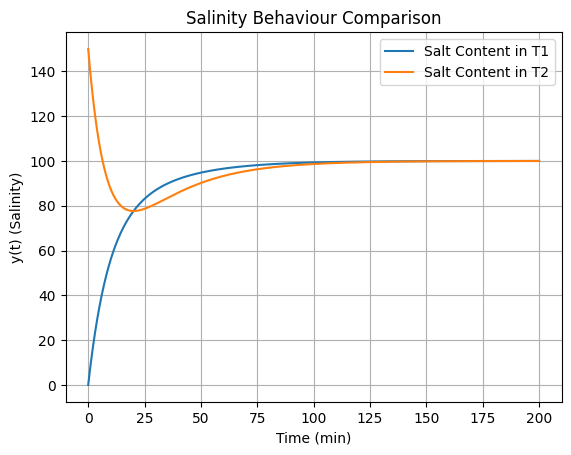

In [ ]:
plt.plot(time,y1dt)
plt.plot(time,y2dt)
plt.title('Salinity Behaviour Comparison')
plt.xlabel('Time (min)')
plt.ylabel('y(t) (Salinity)')
plt.legend(['Salt Content in T1','Salt Content in T2'])
plt.grid(axis = 'both')

In [ ]:
x = odeint(odes, x0, [0,80])
y1dt_at80 = x[:,0][1]
y2dt_at80 = x[:,1][1]
print("At time = 80 min, the Salinity:")
print(f"In Tank T1: {y1dt_at80}")
print(f"In Tank T2: {y2dt_at80}")

At time = 80 min, the Salinity:
In Tank T1: 98.46718436433883
In Tank T2: 96.95130070252404


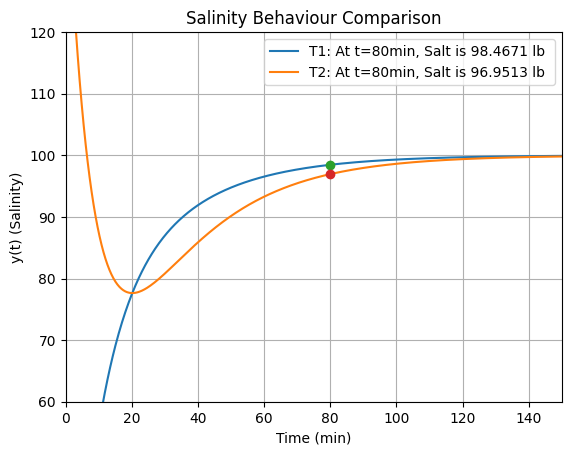

In [ ]:
plt.plot(time,y1dt)
plt.plot(time,y2dt)
plt.xlim(0,150)
plt.ylim(60,120)
plt.title('Salinity Behaviour Comparison')
plt.xlabel('Time (min)')
plt.ylabel('y(t) (Salinity)')
plt.legend(['T1: At t=80min, Salt is 98.4671 lb ','T2: At t=80min, Salt is 96.9513 lb' ])
plt.grid(axis = 'both')
plt.plot([80],[98.46718436433883], marker = 'o')
plt.plot([80],[96.95130070252404], marker = 'o')

In [ ]:
## BELOW IS  APPROACCH 2 (TEDIOUS ONE)

In [48]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import sympy as sp
from sympy.abc import x,y,s,t
from sympy.integrals import laplace_transform, inverse_laplace_transform

In [49]:
s = sp.Symbol('s')
Y = sp.Function('Y')(s)
t = sp.Symbol('t')
y = sp.Function('y')(t)

In [50]:
#Laplace Transform
alpha = input('Enter the function to calculate Laplace transform: ')
print("")
Laplace = laplace_transform(alpha, t,s)
print("The Laplace Transform of")
display(y)
print('')
equation = Eq(Y, Laplace[0])
display(equation)

Enter the function to calculate Laplace transform: 6

The Laplace Transform of


y(t)

       6
Y(s) = ─
       s

In [51]:
#Inverse Laplace Transform
beta = input("Enter the function to calculate Inverse Laplace transform: ")
Inv_Laplace = inverse_laplace_transform(beta,s,t)
print("The Inverse Laplace Transform of")
display(Y)
print('')
Equation = Eq(y,Inv_Laplace)
display(Equation)

Enter the function to calculate Inverse Laplace transform: 6/s
The Inverse Laplace Transform of


Y(s)

y(t) = 6⋅θ(t)

In [53]:
#Partial Fraction
gamma = input("Enter the function to convert into Partial Fraction: ")
Partial = sp.apart(gamma)
display(Partial)

Enter the function to convert into Partial Fraction: s/(s+1)**2


  1        1    
───── - ────────
s + 1          2
        (s + 1) 

In [54]:
#Polynomial Multiplication
delta = input('Enter the polynomial to Expand: ')
Poly = sp.expand(delta)
display(Poly)

Enter the polynomial to Expand: (s+3)*(s-5)*(s+1)


 3    2            
s  - s  - 17⋅s - 15

In [57]:
#Find Roots of the Polynomial
omega = input("Enter the polynomial to to calculate the roots: ")
Roots = sp.roots(omega)
display(Roots)

Enter the polynomial to to calculate the roots: s**2+2*s+2


{-1 - ⅈ: 1, -1 + ⅈ: 1}